# Keşifçi Veri Analizi

Keşifçi veri analizi: Veri bilimcinin söz konusu olmayan yeni bulgulara ulaşabildiği, 
yeni iş fikirleri, yeni işe yarar sonuçlara ulaşabildiği, 
sorular sorarak, hipotezler kurarak ilerlediği süreçtir.

Keşifçi Veri analizinde kullanılabilecek kütüphaneler (En çok kullanılacaklar: Seaborn, pandas, matplotlib):
1. Matplotlib (veri görselleştirmesinde kullandığımız temel python kütüphanesidir.)
2. Pandas (Veri analizi/manuplasyonu için kullanmanın yanında Veri görselleştirme için de kullanılır.)
3. Seaborn (İstatistiksel grafikleri kolayca oluşturmamızı sağlar)
4. ggplot (R kütüphanesinden uyarlanmıştır. Gelişmiş bir veri analizi kütüphanesidir.)
5. Bokeh (interaktif görselleştirme kütüphanesi, büyük ve akan veri setlerinde yüksek performans sağlar.)
6. Plot.ly (Birçok programlama diliyle çalışabilir.interaktif görselleştirme sağlar)

# Veriye İlk Bakış

## Veri Seti Hikayesi ve Yapısının İncelenmesi

In [1]:
import seaborn as sns 
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## Veri setinin oluşma hikayesi nedir, nasıl oluşmuştur? 
Galaksi keşifleriyle ilgili betimsel bir veri seti: 
1. Method: Galaksilerin bulunma şekilleri
2. Number: Galaksideki gezegen sayısı
3. orbital_period: Yörünge dönemi
4. Mass: Kütle
5. Distance: Uzaklık
6. Year: Yıl

In [2]:
df = planets.copy()

In [3]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [4]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


# Veri seti yapısal bilgileri

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [6]:
# object:Kategorik değişkendir. Diğerleri sürekli değişkendir.

In [7]:
#Sadece değişken ve tiplerine ulaşmak için:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [8]:
#object tipini category tipini dönüştürmek için:
import pandas as pd 
df.method = pd.Categorical(df.method)

In [9]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

## Veri Setinin Betimlenmesi

In [9]:
df.shape

(1035, 6)

In [10]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [11]:
#Describe fonksiyonu eksik gözlemleri gözardı eder ve kategorik değişkenleri dışarıda bırakır:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [12]:
#Tüm değişkenleri incelemek için:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035.0,NaN,NaN,NaN,1.785507,1.240976,1.0,1.0,1.0,2.0,7.0
orbital_period,992.0,NaN,NaN,NaN,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,NaN,NaN,NaN,2.638161,3.818617,0.0036,0.229,1.26,3.04,25.0
distance,808.0,NaN,NaN,NaN,264.069282,733.116493,1.35,32.56,55.25,178.5,8500.0
year,1035.0,NaN,NaN,NaN,2009.070531,3.972567,1989.0,2007.0,2010.0,2012.0,2014.0


## Eksik Değerlerin İncelenmesi
Bu konu veri ön işleme aşamasında daha detaylı işlenecektir.

In [13]:
#hiç eksik gözlem (değer) var mı
df.isnull().values.any()

True

In [14]:
#hangi değişkende kaçar tane var
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [15]:
#Eksik verilerin tamamını sıfır ile doldurulabilir:
df["orbital_period"].fillna(0, inplace = True)

In [16]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [17]:
#Eksik verilere ortalama değerler verilebilir:
df["mass"].fillna(df.mass.mean(), inplace = True)

In [18]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

In [19]:
#tüm değişkenlere ortalamaları aktarmak istersek:
df.fillna(df.mean(), inplace = True)

/var/folders/ss/0lsl7gj13fl4_6vbsld5b_pr0000gn/T/ipykernel_68184/3622395527.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace = True)


In [20]:
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [21]:
#Veri setinin yapısını bozduğumuz için tekrar aktarım yapıyoruz:
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [22]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

## Kategorik Değişken Özetleri

### Sadece Kategorik Değişkenler ve Özetleri

In [23]:
#Kategorik değişkenleri yeni bir değişkene çekip atayalım: (Tipe göre değişken seçmek için: select_dtypes)
kat_df = df.select_dtypes(include = ["object"])

In [24]:
kat_df.head(5)

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


### Kategorik Değişkenin Sınıflarına ve Sınıf Sayısına Erişmek

In [25]:
#Değişkendeki sınıf bilgisi için:
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [26]:
#Kaç sınıftan oluştuğunu saydırmak için:
kat_df["method"].value_counts().count()

10

### Kategorik Değişkenin Sınıflarının Frekanslarına Erişmek

In [27]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

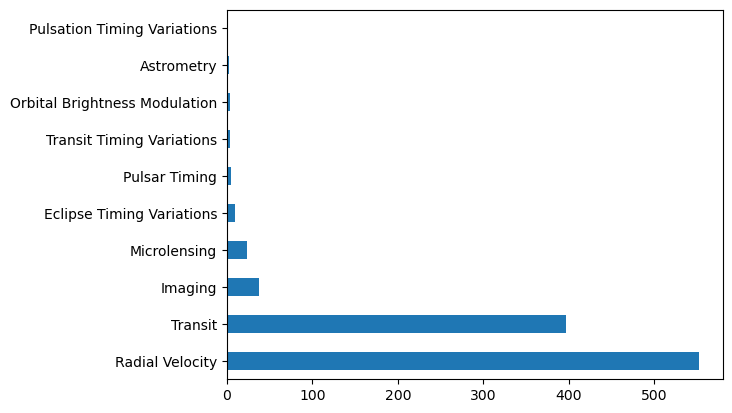

In [28]:
#Method değişkeninin görselleştirilmesi:
df["method"].value_counts().plot.barh();

## Sürekli Değişken Özetleri

In [29]:
#Sürekli değişkenleri seçme:
df_num = df.select_dtypes(include = ["float64", "int64"])

In [30]:
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [31]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [32]:
#Değişken özelince inceleme yapmak için:
df_num["distance"].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [33]:
print("Ortalama: " + str(df_num["distance"].mean()))
print("Dolu Gözlem Sayısı: " + str(df_num["distance"].count())) 
print("Maksimum Değer: " + str(df_num["distance"].max()))
print("Minimum Değer: " + str(df_num["distance"].min()))
print("Medyan: " + str(df_num["distance"].median()))
print("Standart Sapma: " + str(df_num["distance"].std()))

Ortalama: 264.06928217821786
Dolu Gözlem Sayısı: 808
Maksimum Değer: 8500.0
Minimum Değer: 1.35
Medyan: 55.25
Standart Sapma: 733.1164929404422


# Dağılım Grafikleri

## Barplot (Sütun Grafikleri)
Elimizdeki kategorik değişkenleri görselleştirmek için kullanılır.

**Yeni Veri Seti Hikayesi**

1. price: dolar cinsinde fiyat ($326–$18,823)
2. carat: ağırlık (0.2–5.01)
3. cut: kalite (Fair, Good, Very Good, Premium, Ideal)
4. color: renk (from J (worst) to D (best))
5. clarity: temizliği, berraklığı (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. x: length in mm (0–10.74)
7. y: width in mm (0–58.9)
8. z: depth in mm (0–31.8)
9. depth: toplam derinlik yüzdesi = z / mean(x, y) = 2 * z / (x + y) (43–79)
10. table: elmasın en geniş noktasına göre genişliği (43–95)

In [34]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Veri Setine Hızlı Bakış**

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [37]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [38]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [39]:
df["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [ ]:
#Kategorik değişkenler incelendiğinde nominal değil, ordinal olduklarını görüyoruz. Sınıflar arasında fark var. 
#Bu durumu tanımlamamız gerekir.

In [40]:
#ordinal tanımlama 
from pandas.api.types import CategoricalDtype

In [41]:
#cut değişkenini inceleyelim:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [42]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))

In [43]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [44]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [45]:
#Verilen sıralama doğrumu kontrol edilmeli. Yanlışsa önce doğru sıralamanın olduğu liste oluşturulur:
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]

In [46]:
#Yeniden ordinal tanımlama yapma:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))

In [47]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

# Barplot Grafiği Oluşturma:

In [ ]:
#Pandas ile görselleştirme:

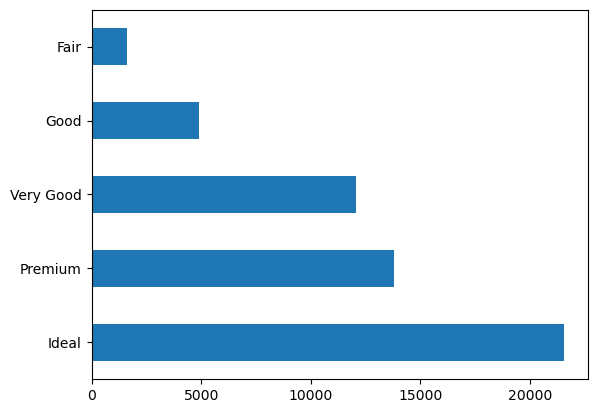

In [48]:
df["cut"].value_counts().plot.barh();

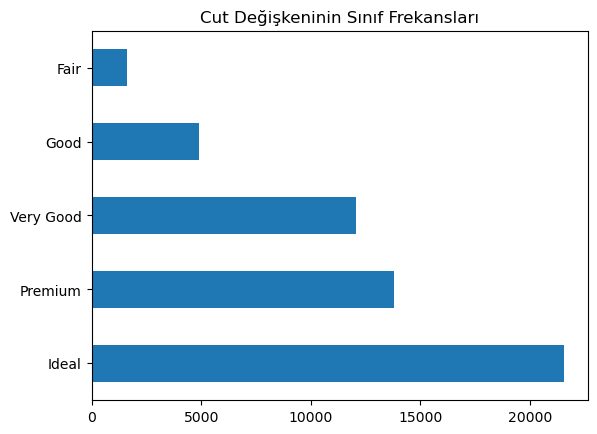

In [49]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları");

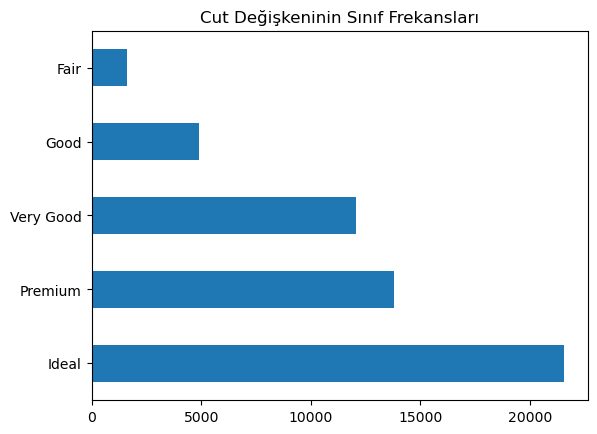

In [50]:
#Daha okunabilir bir kod yazım tarzı:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

In [ ]:
#Seaborn ile görselleştirme:

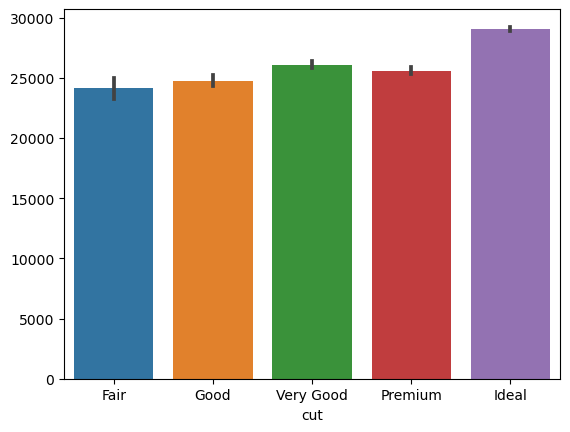

In [51]:
sns.barplot(x = "cut", y = df.cut.index, data= df);

## Çaprazlamalar
Değişkenlerin etkilerinin birlikte ele alınması

In [52]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
clarity_kategoriler = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
color_kategoriler = ["J","I","H","G","F","E","D"]
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
df.color = df.color.astype(CategoricalDtype(categories = color_kategoriler, ordered = True))
df.clarity = df.clarity.astype(CategoricalDtype(categories = clarity_kategoriler, ordered = True))

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [53]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,53940.0,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01
cut,53940,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53940,7,G,11292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53940,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,53940.0,NaN,NaN,NaN,61.749405,1.432621,43.0,61.0,61.8,62.5,79.0
table,53940.0,NaN,NaN,NaN,57.457184,2.234491,43.0,56.0,57.0,59.0,95.0
price,53940.0,NaN,NaN,NaN,3932.799722,3989.439738,326.0,950.0,2401.0,5324.25,18823.0
x,53940.0,NaN,NaN,NaN,5.731157,1.121761,0.0,4.71,5.7,6.54,10.74
y,53940.0,NaN,NaN,NaN,5.734526,1.142135,0.0,4.72,5.71,6.54,58.9
z,53940.0,NaN,NaN,NaN,3.538734,0.705699,0.0,2.91,3.53,4.04,31.8


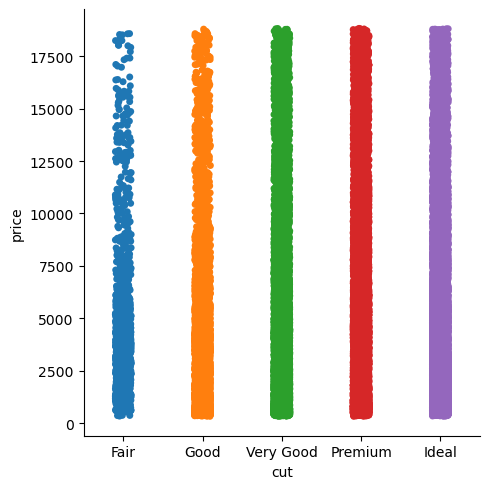

In [54]:
#cut ve price değişkenlerinin çaprazlanması:
sns.catplot(x = "cut", y = "price", data = df);

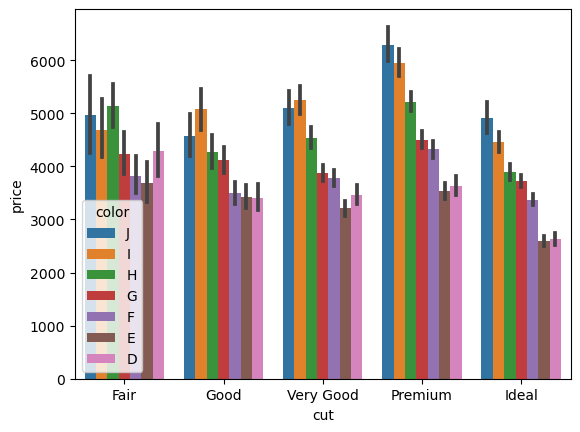

In [55]:
#Bir boyut(kırılım) daha eklemek için:
sns.barplot(x = "cut", y = "price", hue = "color", data = df);
#seaborn high level bir fonksiyon olduğundan veriyi temsil eden bir yansıtma yapar. y ekseni bozulmamıştır. (Toplulaştırma yaparak sonuçları verir)

In [56]:
#Seaborn, grafiği oluşturuken cut ve color değişkenlerindeki price değerlerinin ortalamasını alarak grafiği verir. Doğrulamak için:
df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       J        4975.655462
           I        4685.445714
           H        5135.683168
           G        4239.254777
           F        3827.003205
           E        3682.312500
           D        4291.061350
Good       J        4574.172638
           I        5078.532567
           H        4276.254986
           G        4123.482204
           F        3495.750275
           E        3423.644159
           D        3405.382175
Very Good  J        5103.513274
           I        5255.879568
           H        4535.390351
           G        3872.753806
           F        3778.820240
           E        3214.652083
           D        3470.467284
Premium    J        6294.591584
           I        5946.180672
           H        5216.706780
           G        4500.742134
           F        4324.890176
           E        3538.914420
           D        3631.292576
Ideal      J        4918.186384
           I        4451.970377
           H        388

## Histogram ve Yoğunluk
Sayısal değişkenlerin dağılımı için kullanılır.

In [57]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


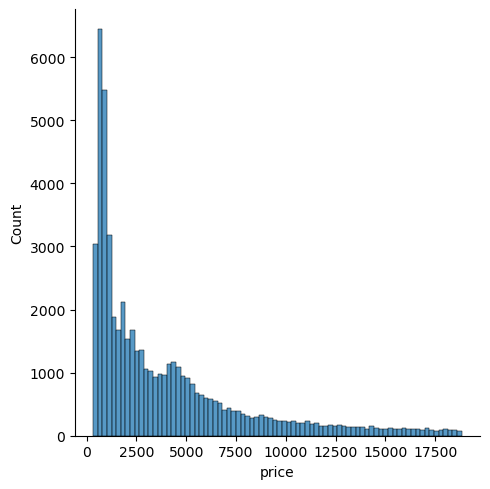

In [58]:
sns.displot(df.price, kde = False);
#Histogram, elimizdeki sayısal değişkenin değerlerini belirli aralıklara böler ve
# belirli aralıklardaki ilgili değerlerin gözlenme frekanslarını yansıtır.

In [ ]:
?sns.displot

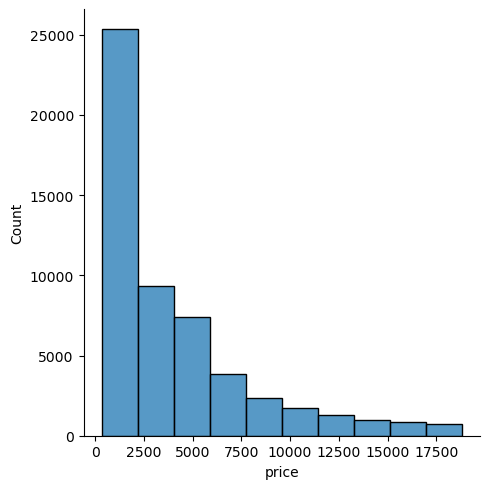

In [59]:
#bins (aralıklar) kullanımı:
sns.displot(df.price, bins = 10, kde = False);

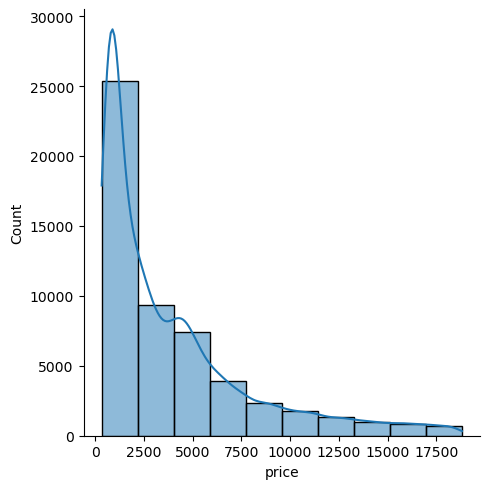

In [60]:
sns.displot(df.price, bins = 10, kde = True);

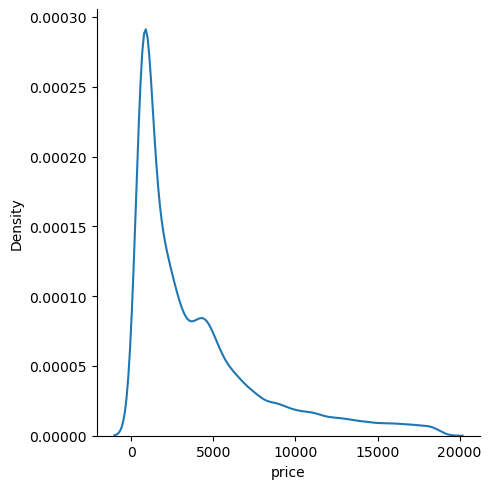

In [61]:
#KDE, verilerden tahmin edilen bir histogramın doğrusal anlamda düzenleştirilmiş haldir. 
sns.displot(df.price, kind="kde");

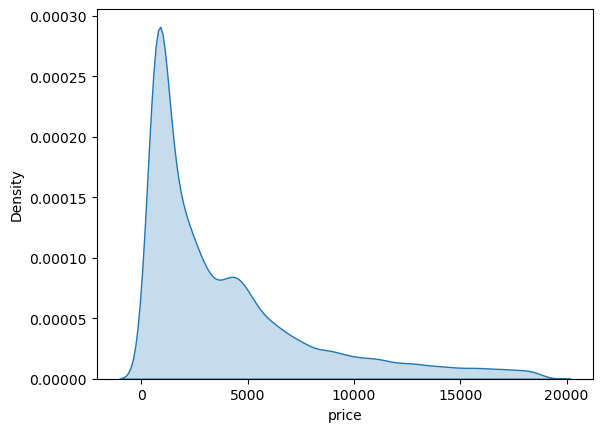

In [62]:
sns.kdeplot(df.price, shade = True);

## Çaprazlamalar

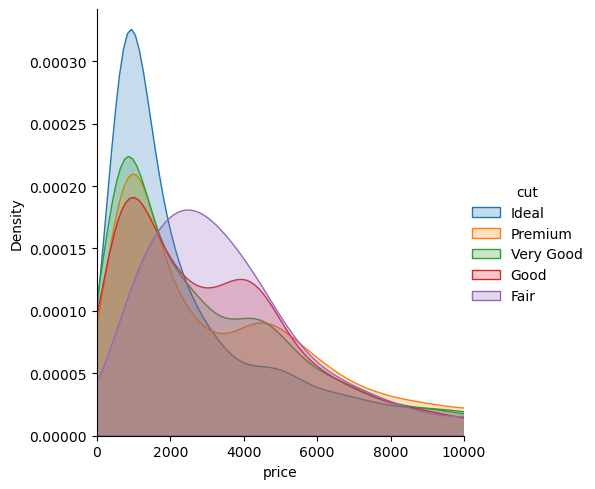

In [63]:
#grafik üzerine eklenen boyutları ayrı ayrı göstermek için facegrid kullanılır)
#add_legend bilgi eklemek için
(sns
 .FacetGrid(df,
              hue = "cut",
              height = 5,
              xlim = (0, 10000))
 .map(sns.kdeplot, "price", shade= True)
 .add_legend()
);

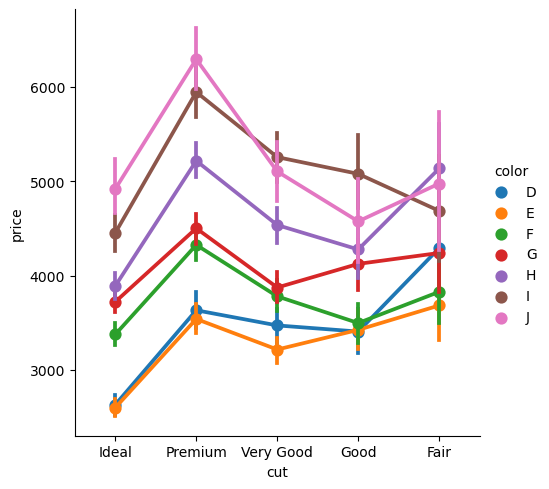

In [64]:
#Fiyatın farklı seviyelerinde 2 kategorik değişkenin etkileri:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);

## Boxplot

### Veri Seti Hikayesi

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [65]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [67]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [68]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [69]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [70]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

## Boxplot

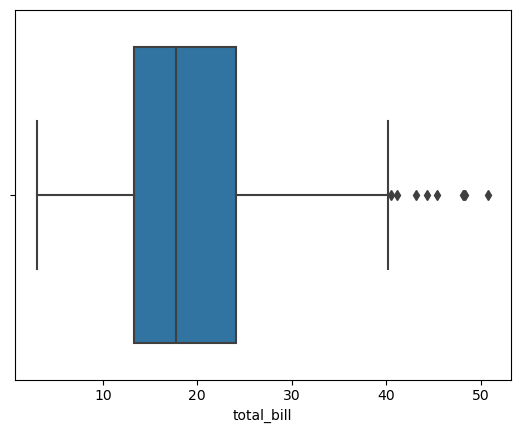

In [71]:
sns.boxplot(x = df["total_bill"]);

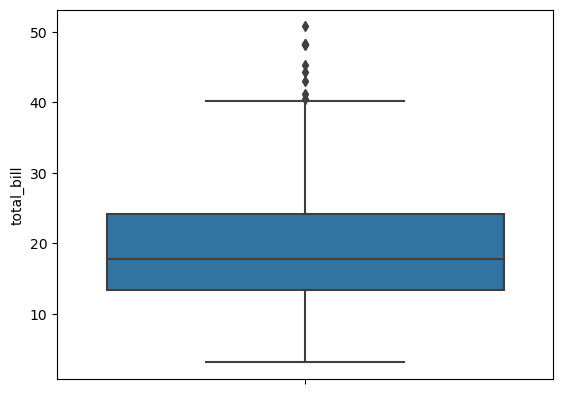

In [72]:
sns.boxplot(y = df["total_bill"], orient = "v");

## Çaprazlamalar

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [ ]:
#Hangi gunler daha fazla kazanıyoruz?

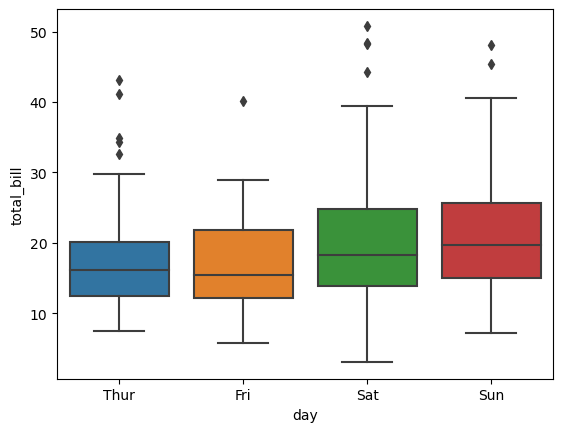

In [74]:
sns.boxplot(x = "day", y = "total_bill", data = df);

In [75]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [ ]:
#sabah mı akşam mı daha çok kazanıyoruz?

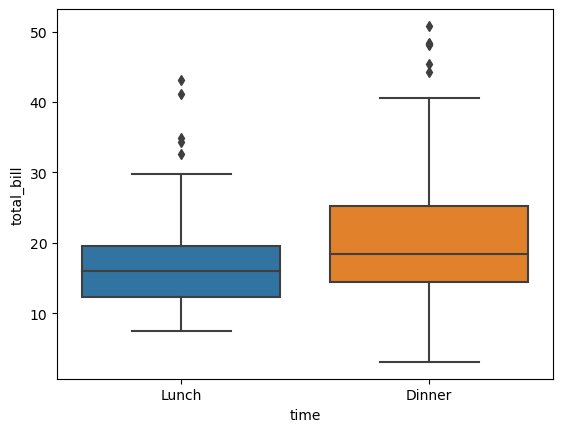

In [76]:
sns.boxplot(x = "time", y = "total_bill", data = df);

In [ ]:
#kisi sayısı kazanc

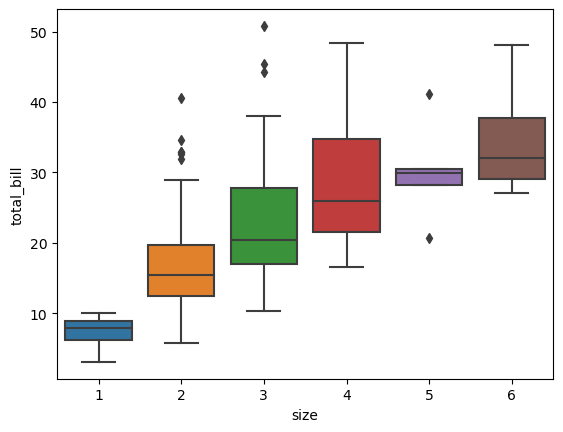

In [77]:
sns.boxplot(x = "size", y = "total_bill", data = df);

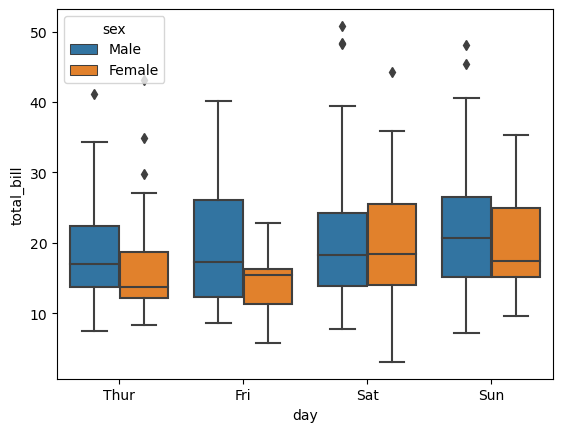

In [78]:
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = df);

## Violin

In [79]:
#Dağılıma ilişkin bilgi sunar. Boxplota benzerdir. Yoğunluk ve kutu grafiğinin kesişimi olarak düşünülebilir.
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


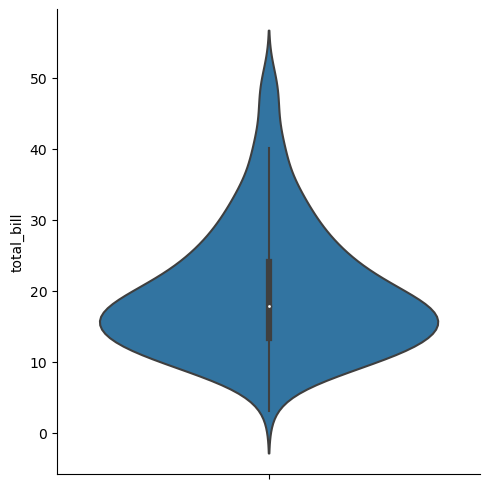

In [80]:
sns.catplot(y = "total_bill", kind = "violin", data = df);

## Çaprazlamalar

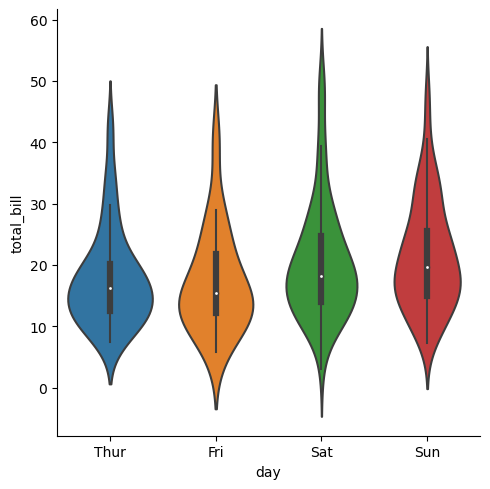

In [81]:
sns.catplot(x= "day", y = "total_bill", kind = "violin", data = df);

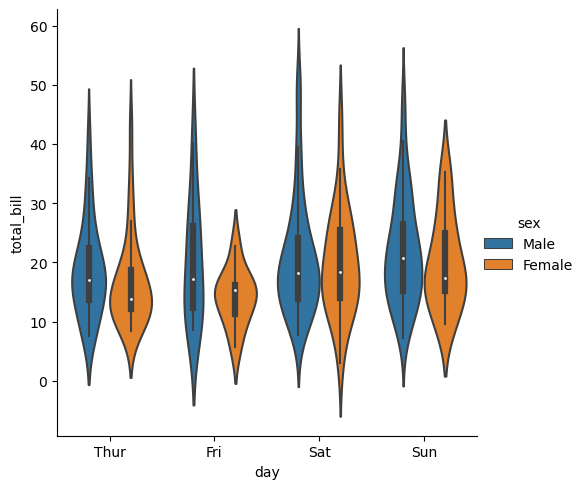

In [82]:
sns.catplot(x= "day", y = "total_bill", hue = "sex",kind = "violin", data = df);

# Korelasyon Grafikleri

## Scatterplot

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [83]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


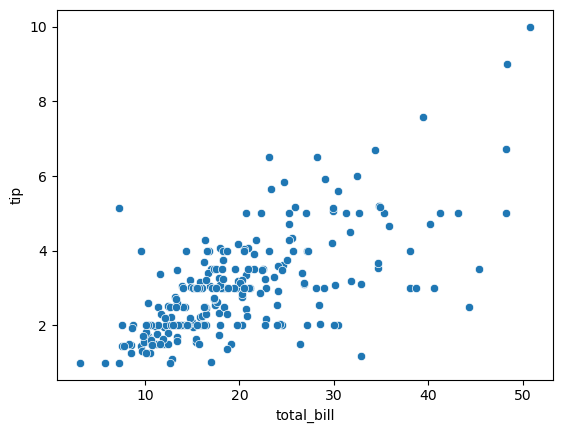

In [84]:
sns.scatterplot(x = "total_bill", y = "tip", data = df);

## Çaprazlamalar

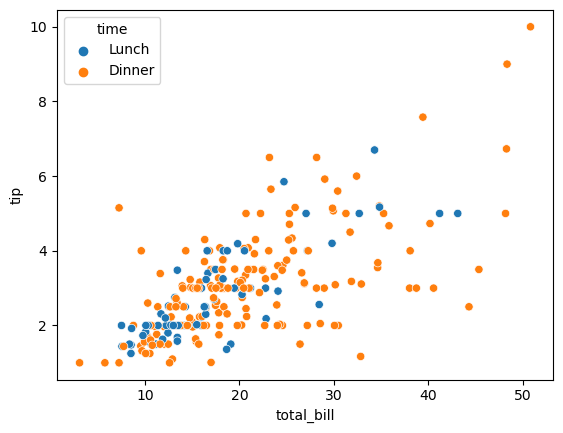

In [85]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time",data = df);

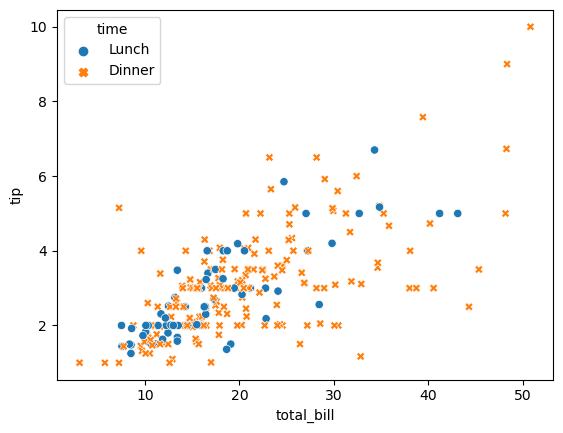

In [86]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", style = "time", data = df);

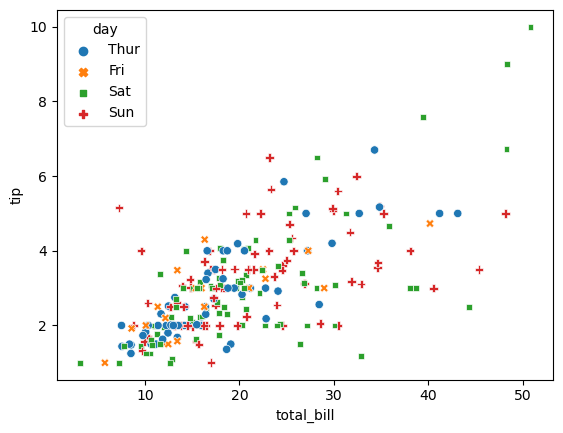

In [87]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "day", style = "day", data = df);

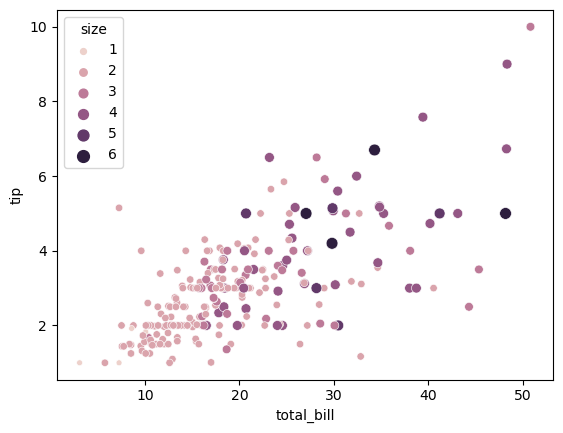

In [88]:
sns.scatterplot(x = "total_bill", y = "tip", hue= "size", size = "size", data = df);

## Doğrusal İlişkinin Gösterilmesi

In [89]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [90]:
import matplotlib.pyplot as plt

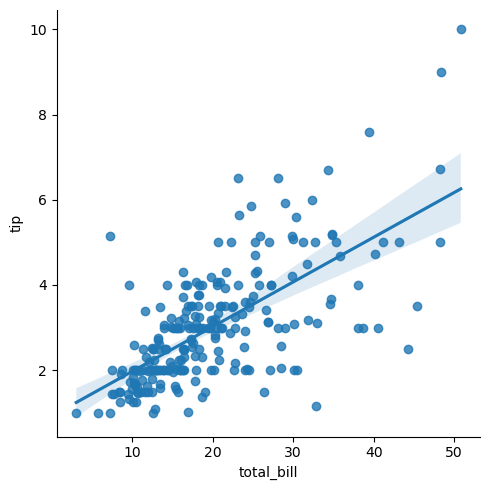

In [91]:
#lineermodel'in kısaltması. Doğrusal çizgi koymak için:
sns.lmplot(x = "total_bill", y = "tip", data = df);

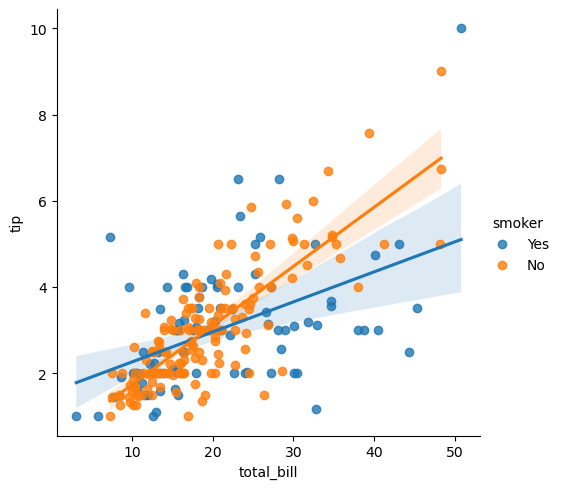

In [92]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = df);

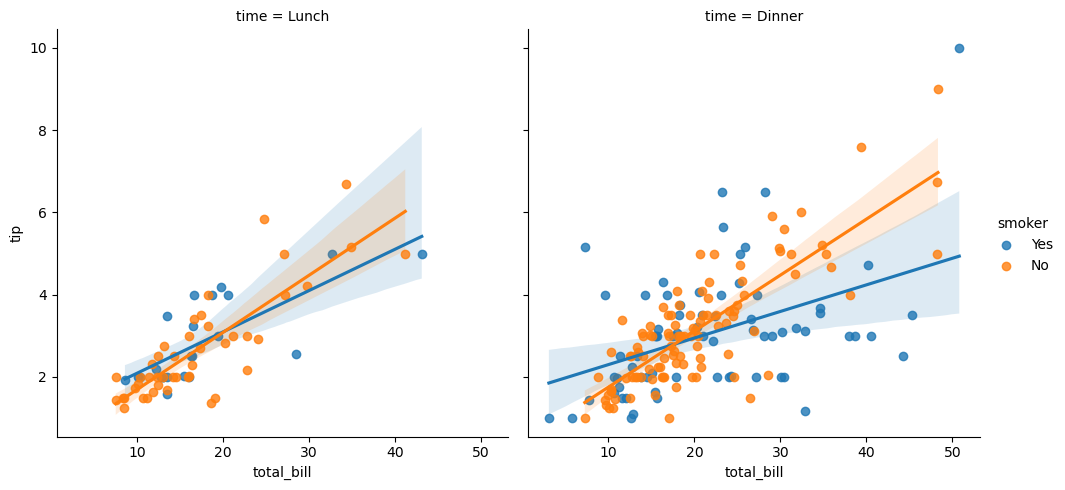

In [93]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = df);

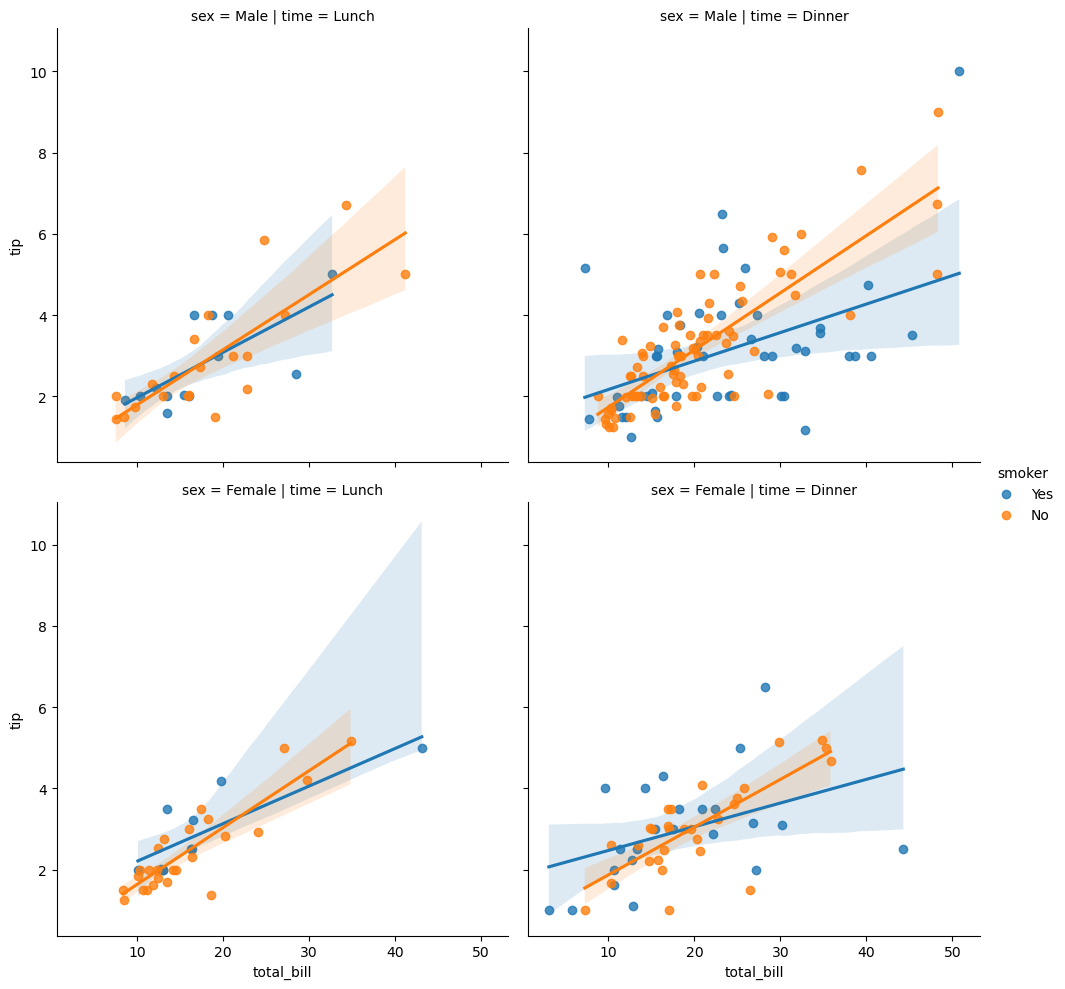

In [94]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", row = "sex", data = df);

## Scatterplot Matrisi
### Sayısal değişkenler arasındaki ilişkiyi veren saçılım grafikleri

In [95]:
import seaborn as sns; 
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [96]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [97]:
df.shape

(150, 5)

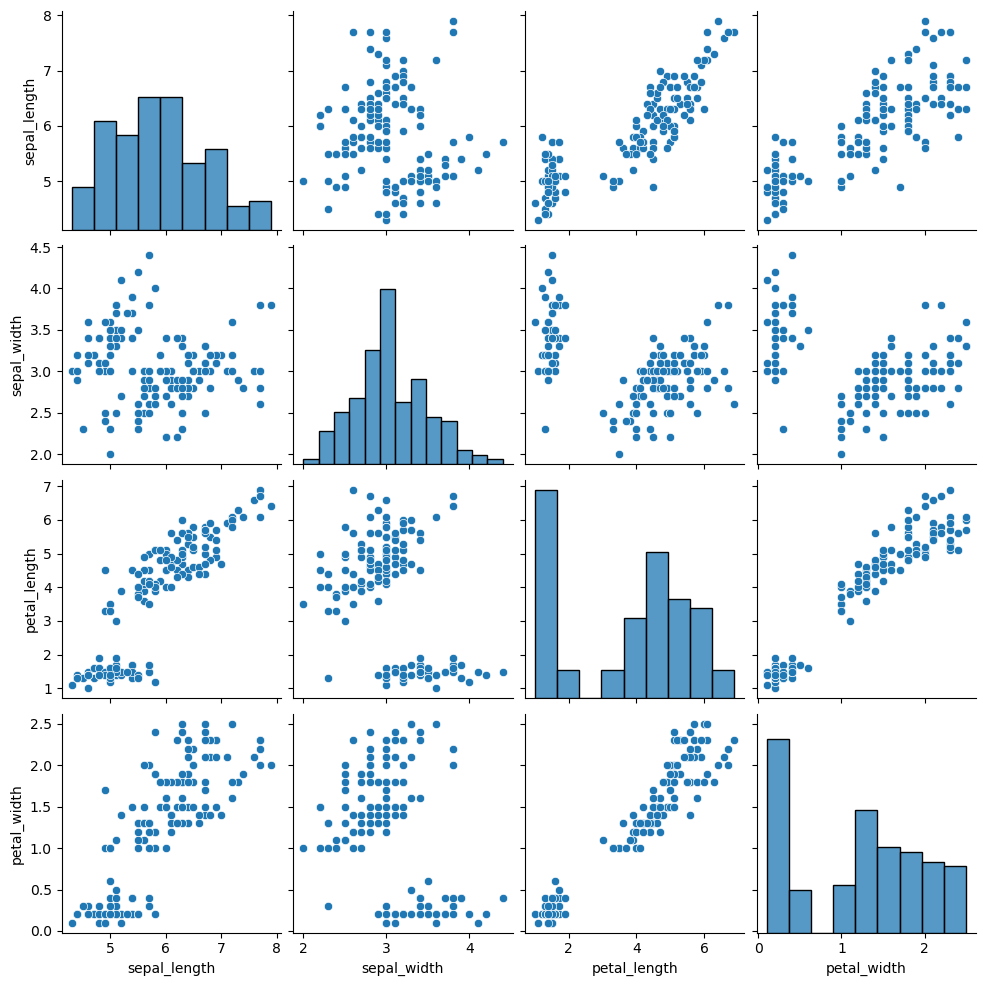

In [98]:
sns.pairplot(df);
#Grafik toz bulutu şeklindeyse veya yapısal bir formu yoksa ilişki yok anlamına gelir.
#Farklı köşelerde kümeleniyorsa farklı alt gruplar vardır.

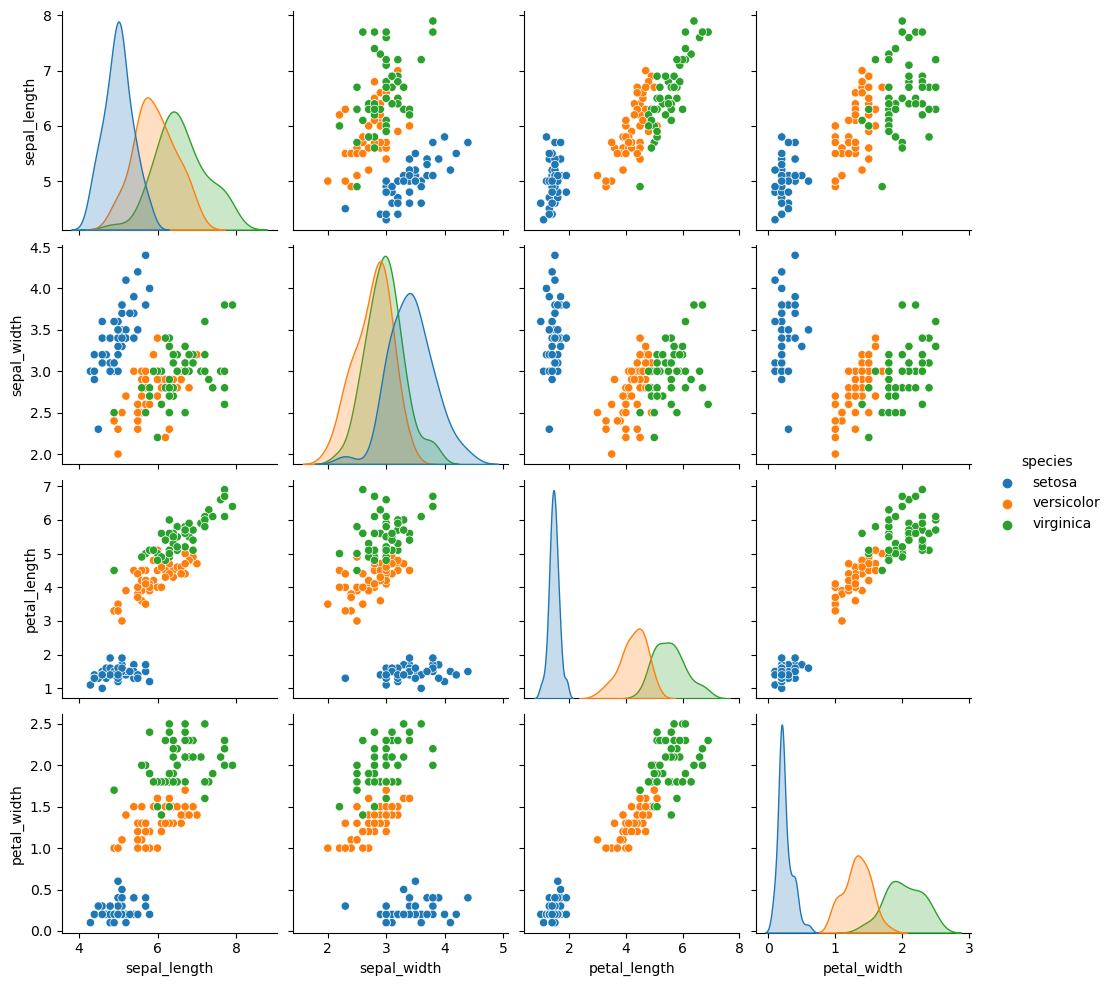

In [99]:
sns.pairplot(df, hue = "species");

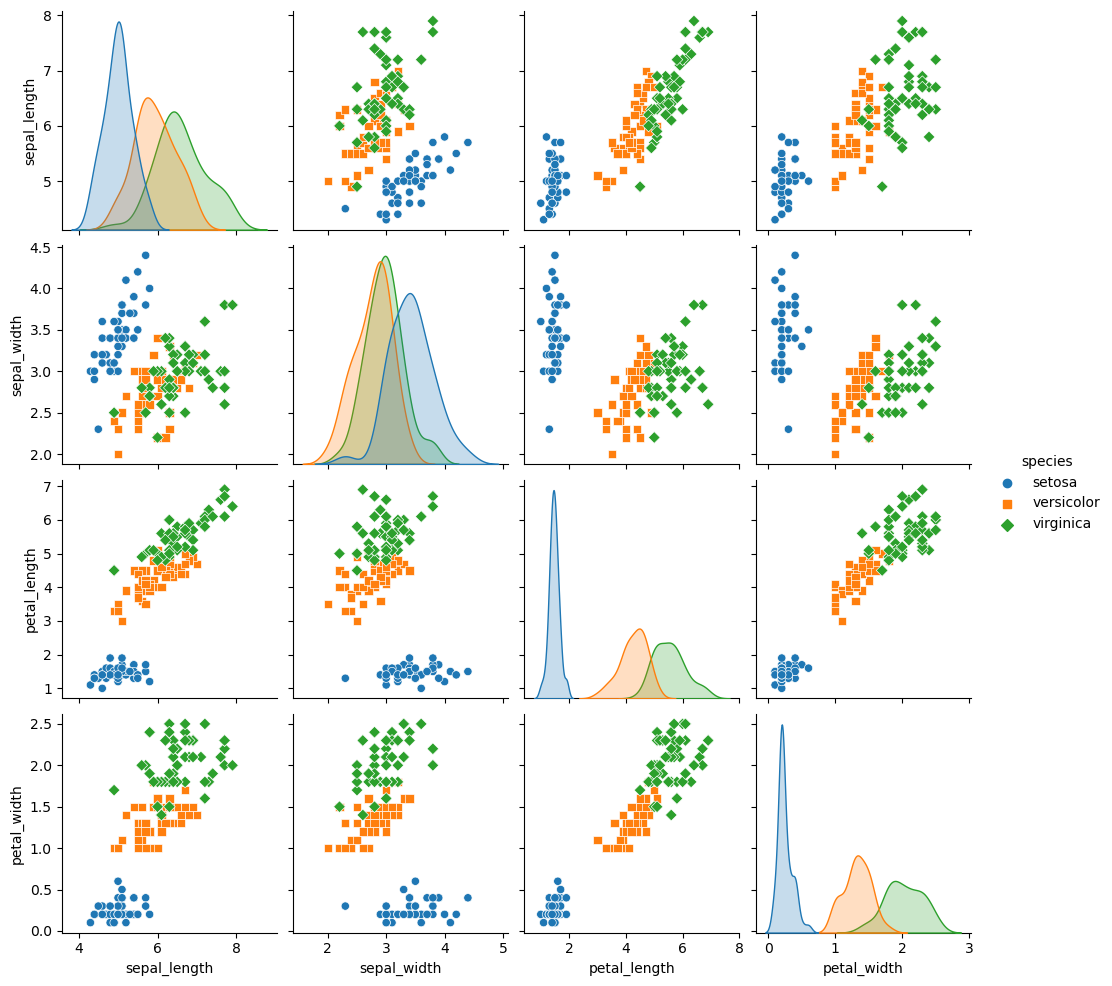

In [100]:
sns.pairplot(df, hue = "species", markers = ["o","s","D"]);

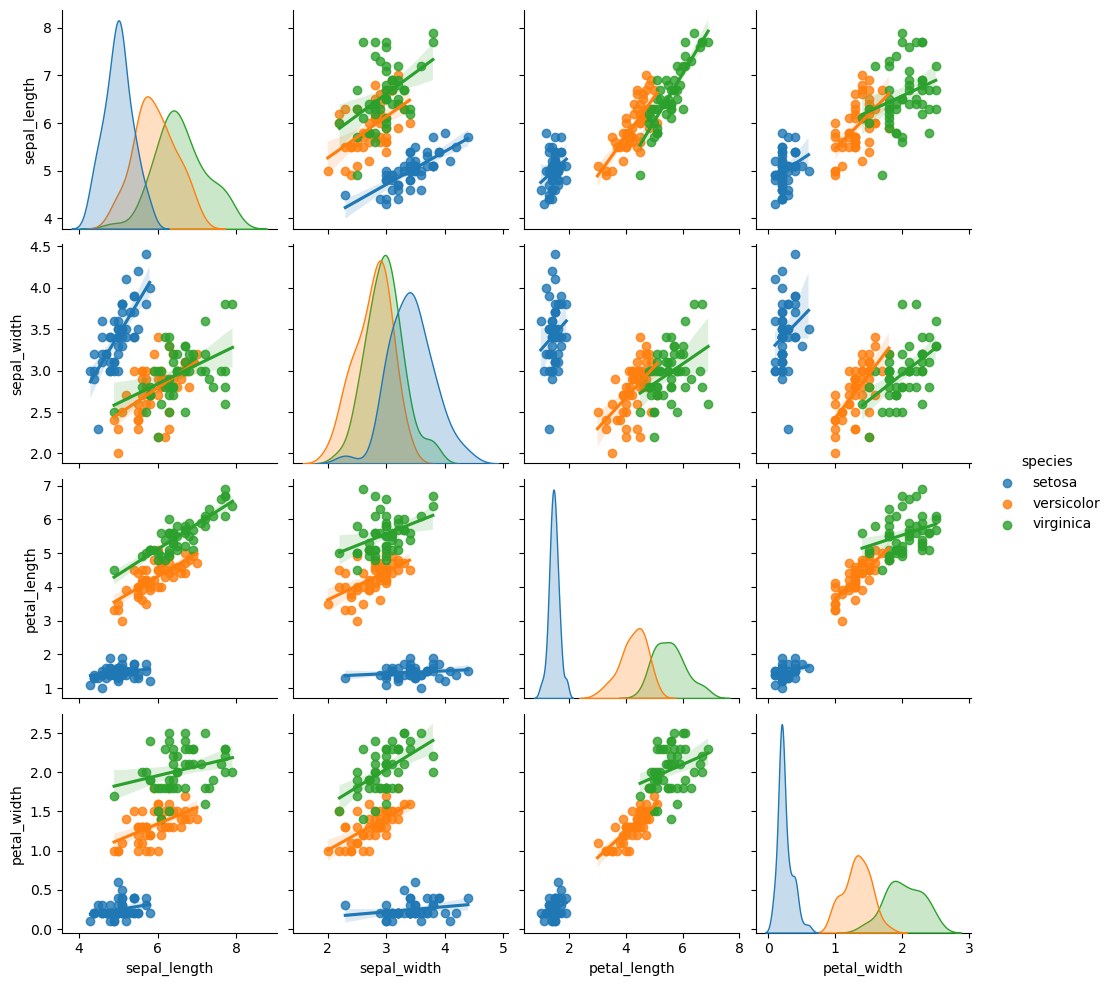

In [101]:
sns.pairplot(df, kind = "reg", hue = "species");

# Heatmap
#Elimizdeki değişkenleri daha geniş perspektiften görmemizi sağlar. Uzun vadeli verilerde sayısal değişkenler gözlemlenebilir. Çok sınıflı kategorik veriler ve sayısal değişken açısından görselleştirme durumunda oldukça işe yarar.

## Veri Seti Hikayesi

In [102]:
import seaborn as sns
flights = sns.load_dataset('flights')
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [103]:
df.shape

(144, 3)

In [104]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [105]:
# x ekseninde ayları y ekseninde yılları koyacak şekilde tablolaştıralım. Heatmap yapısal form ister.
df = df.pivot("month", "year", "passengers");

In [106]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


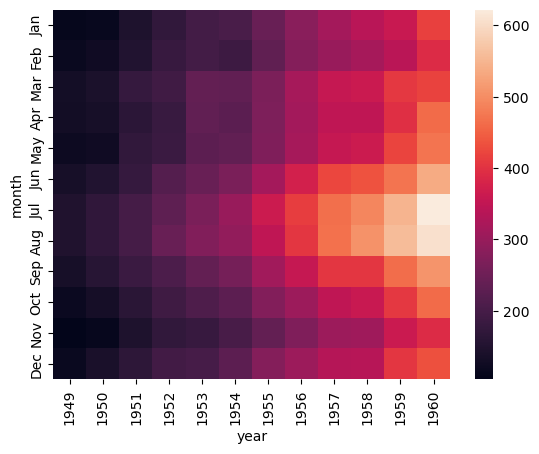

In [107]:
sns.heatmap(df);

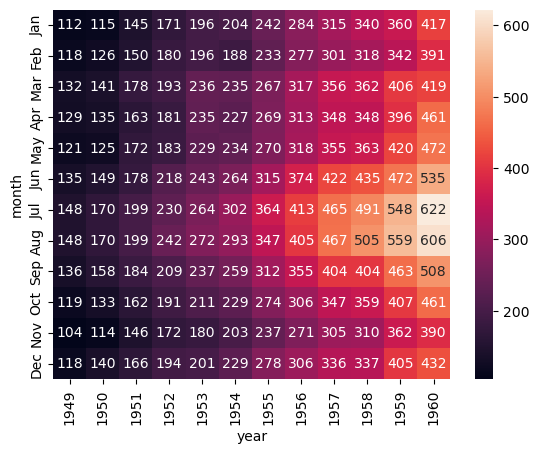

In [110]:
sns.heatmap(df, annot = True, fmt = "d");

In [ ]:
?sns.heatmap

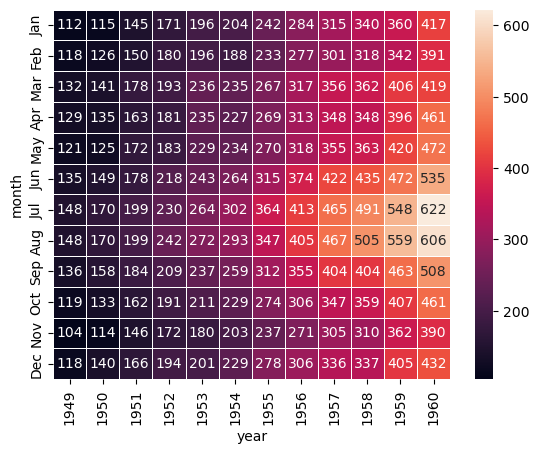

In [113]:
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5);

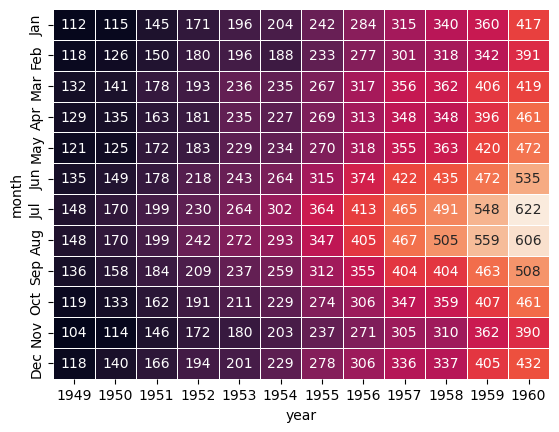

In [114]:
#Sağ taraftaki barı kaldırmak için cbar argümanı kullanılabilir:
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5, cbar = False);

# Çizgi Grafik
#zamana bağlı verilerde, nesnelerin interneti gibi makinelerin ürettiği verileri görselleştirmek için kullanılabilir.

## Veri Seti Hikayesi

In [115]:
#Beyne bağlı cihaz aracılığıyla toplanan sinyalleri ifade eden veri seti.
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [116]:
df.shape

(1064, 5)

In [117]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [118]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [120]:
#Her bi zaman noktasında acaba eşit sinyal mi var?
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [121]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


## Çizgi Grafik ve Çaprazlamalar

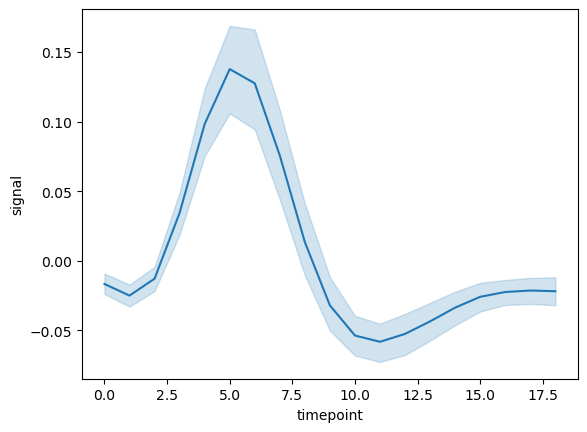

In [122]:
sns.lineplot(x = "timepoint", y = "signal", data = df);

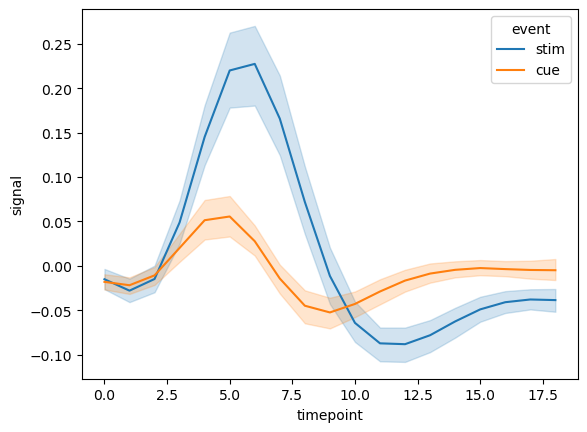

In [123]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", data = df);

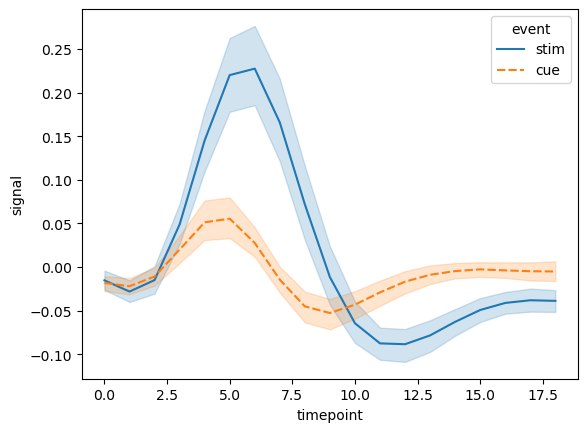

In [124]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", style = "event", data = df);

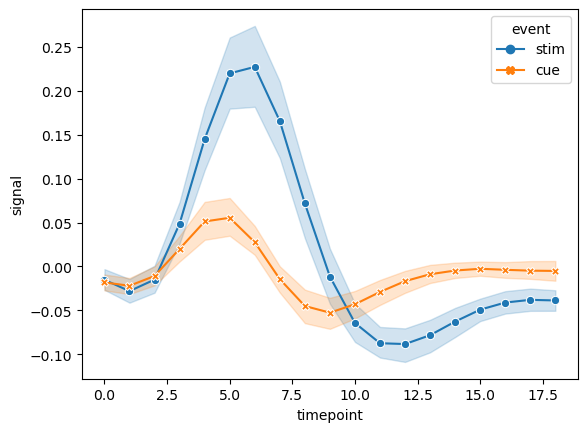

In [36]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "event", 
             style = "event", 
             markers = True,  dashes = False, data = df);

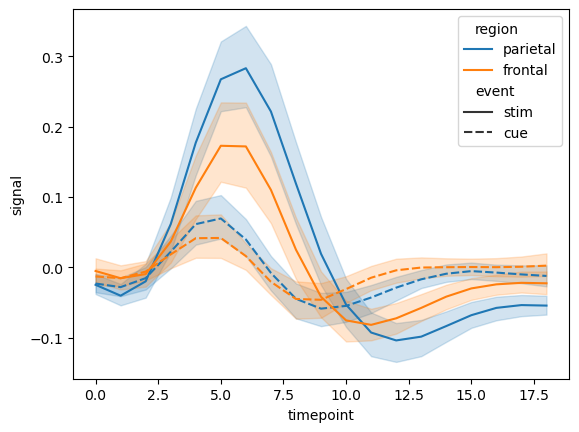

In [125]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "region", 
             style = "event", 
             data = df);